In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.6.0'

In [ ]:
sklearn.__doc__

'Configure global settings and get information about the working environment.'

In [ ]:
dir(sklearn)

['calibration',
 'clone',
 'cluster',
 'compose',
 'config_context',
 'covariance',
 'cross_decomposition',
 'datasets',
 'decomposition',
 'discriminant_analysis',
 'dummy',
 'ensemble',
 'exceptions',
 'experimental',
 'externals',
 'feature_extraction',
 'feature_selection',
 'frozen',
 'gaussian_process',
 'get_config',
 'impute',
 'inspection',
 'isotonic',
 'kernel_approximation',
 'kernel_ridge',
 'linear_model',
 'manifold',
 'metrics',
 'mixture',
 'model_selection',
 'multiclass',
 'multioutput',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised',
 'set_config',
 'show_versions',
 'svm',
 'tree']

The dataset :
In this article, we will predict whether a student will be admitted to a particular college, based on their gmat, gpa scores and work experience. The dependent variable here is a Binary Logistic variable, which is expected to take strictly one of two forms i.e., admitted or not admitted.

Building the Logistic Regression model :
Statsmodels is a Python module that provides various functions for estimating different statistical models and performing statistical tests  

First, we define the set of dependent(y) and independent(X) variables. If the dependent variable is in non-numeric form, it is first converted to numeric using dummies.
Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

In [ ]:
# importing libraries
import statsmodels.api as sm
import pandas as pd

# loading the training dataset
!gdown 1CZOcyklVT3VemH02qY922AqviKm9Ln-E
df = pd.read_csv('logit_train1.csv', index_col = 0)

# defining the dependent and independent variables
Xtrain = df[['gmat', 'gpa', 'work_experience']]
ytrain = df[['admitted']]

# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()


Downloading...
From: https://drive.google.com/uc?id=1CZOcyklVT3VemH02qY922AqviKm9Ln-E
To: /content/logit_train1.csv
100% 476/476 [00:00<00:00, 1.56MB/s]
Optimization terminated successfully.
         Current function value: 0.352707
         Iterations 8


In [ ]:
# printing the summary table
print(log_reg.summary())


                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            2
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.4912
Time:                        08:31:31   Log-Likelihood:                -10.581
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 3.668e-05
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gmat               -0.0262      0.011     -2.383      0.017      -0.048      -0.005
gpa                 3.9422      1.964      2.007      0.045       0.092       7.792
work_experience     1.1983      

##Explanation of some of the terms in the summary table:

coef : the coefficients of the independent variables in the regression equation.

Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.

LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).

Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.

Predicting on New Data :
Now we shall test our model on new test data.
The predict() function is useful for performing predictions. The predictions obtained are fractional values(between 0 and 1) which denote the probability of getting admitted. These values are hence rounded, to obtain the discrete values of 1 or 0.

In [ ]:
# loading the testing dataset
!gdown 15tml_LIeBE2Nl7-ilk-BpIBwXVxAjbWP
df = pd.read_csv('logit_test1.csv', index_col = 0)

# defining the dependent and independent variables
Xtest = df[['gmat', 'gpa', 'work_experience']]
ytest = df['admitted']

# performing predictions on the test dataset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))

# comparing original and predicted values of y
print('Actual values', list(ytest.values))
print('Predictions :', prediction)


Downloading...
From: https://drive.google.com/uc?id=15tml_LIeBE2Nl7-ilk-BpIBwXVxAjbWP
To: /content/logit_test1.csv
100% 184/184 [00:00<00:00, 554kB/s]
Actual values [0, 0, 0, 0, 0, 1, 1, 0, 1, 1]
Predictions : [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [ ]:
##testing accuracy

In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

# confusion matrix
cm = confusion_matrix(ytest, prediction)
print ("Confusion Matrix : \n", cm)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))


Confusion Matrix : 
 [[6 0]
 [2 2]]
Test accuracy =  0.8


Linear regression analysis is a statistical technique for predicting the value of one variable(dependent variable) based on the value of another(independent variable). The dependent variable is the variable that we want to predict or forecast. In simple linear regression, there’s one independent variable used to predict a single dependent variable. In the case of multilinear regression, there’s more than one independent variable. The independent variable is the one you’re using to forecast the value of the other variable. The statsmodels.regression.linear_model.OLS method is used to perform linear regression.
y = mx+cm = slopec = constant

Parameters:



endog: array like object.
exog: array like object.
missing: str. None, decrease, and raise are the available alternatives. If the value is ‘none,’ no nan testing is performed. Any observations with nans are dropped if ‘drop’ is selected. An error is raised if ‘raise’ is used. ‘none’ is the default.
hasconst: None or Bool. Indicates whether a user-supplied constant is included in the RHS. If True, k constant is set to 1 and all outcome statistics are calculated as if a constant is present. If False, k constant is set to 0 and no constant is verified.
**kwargs: When using the formula interface, additional arguments are utilised to set model characteristics.


Return: Ordinary least squares are returned.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
!gdown 1GB8op5sjtRyCq4bDV3iqUqisG1Yfhrl4
df = pd.read_csv('headbrain11.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1GB8op5sjtRyCq4bDV3iqUqisG1Yfhrl4
To: /content/headbrain11.csv
100% 2.64k/2.64k [00:00<00:00, 7.36MB/s]


,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


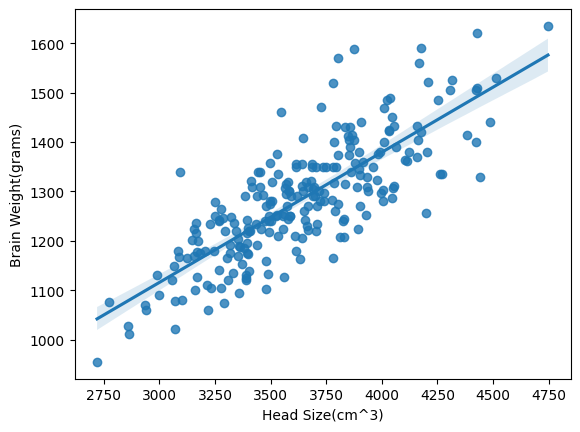

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x='Head Size(cm^3)', y='Brain Weight(grams)', data=df)
plt.show()

Step 3: Setting a hypothesis.

Null hypothesis (H0): There is no relationship between head size and brain weight.
Alternative hypothesis (Ha): There is a relationship between head size and brain weight.

Step 4: Fitting the model

statsmodels.regression.linear_model.OLS() method is used to get ordinary least squares, and fit() method is used to fit the data in it. The ols method takes in the data and performs linear regression. we provide the dependent and independent columns in this format :

inpendent_columns ~ dependent_column:
left side of the ~ operator contains the independent variables and right side of the operator contains the name of the dependent variable or the predicted column.

In [ ]:
import statsmodels.formula.api as smf
df.columns = ['Head_size', 'Brain_weight']
model = smf.ols(formula='Head_size ~ Brain_weight', data=df).fit()

Step 5: Summary of the model.

All the summary statistics of the linear regression model are returned by the model.summary() method. The p-value and many other values/statistics are known by this method. Predictions about the data are found by the model.summary() method.

In [ ]:
 print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Head_size   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           5.96e-54
Time:                        08:31:43   Log-Likelihood:                -1613.4
No. Observations:                 237   AIC:                             3231.
Df Residuals:                     235   BIC:                             3238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      520.6101    153.215      3.398   

Description of some of the terms in the table :
 R- squared value: R-squared value ranges between 0 and 1. An R-squared of 100 percent indicates that all changes in the dependent variable are completely explained by changes in the independent variable(s). if we get 1 as an r-squared value it means there’s a perfect fit. In our example, the r-squared value is 0.638.
F- statistic: The F statistic simply compares the combined effect of all variables. In simplest terms, reject the null hypothesis if your alpha level is greater than your p-value.
coef: the coefficients of the independent variables in the regression equation.

Our predictions:
If we take our significance level (alpha) to be 0.05, we reject the null hypothesis and accept the alternative hypothesis as p<0.05.
So, we can say that there is a relationship between head size and brain weight.

##MPG dataset ML using Stats Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
df.drop("name", axis =1, inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [ ]:
df.isna().sum() ## 6 NAN values in col 'horsepower'

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0


In [ ]:
df['horsepower'].median()

93.5

In [ ]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median()) #no outlier treatment done, so use fillna() with median safeside

In [ ]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0


In [ ]:
df.info()    #col 'origin' has dtype=object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [ ]:
df.origin.unique() #only origin shows df datatype object so we encoding for using ML alogorithm later

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
df.origin.value_counts()

,count
origin,
usa,249
japan,79
europe,70


In [ ]:
df['origin'] = df['origin'].map({"usa":1, "japan": 2, "europe": 3}) #Label encoding
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,3
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [ ]:
#multicollinearity>> when one feature is explained by all other features
#when two features>> correlation
#more than two features>> vif, clustermap

<Axes: >

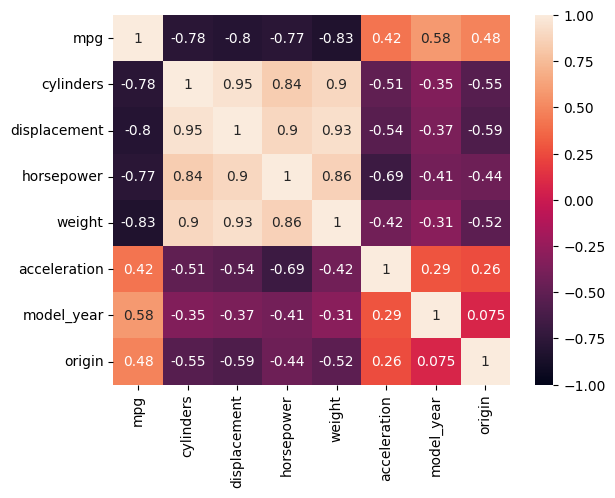

In [ ]:
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1) #vmax= most +ve corr, vmin= most -ve corr, 0 means no corr

<Figure size 500x500 with 0 Axes>

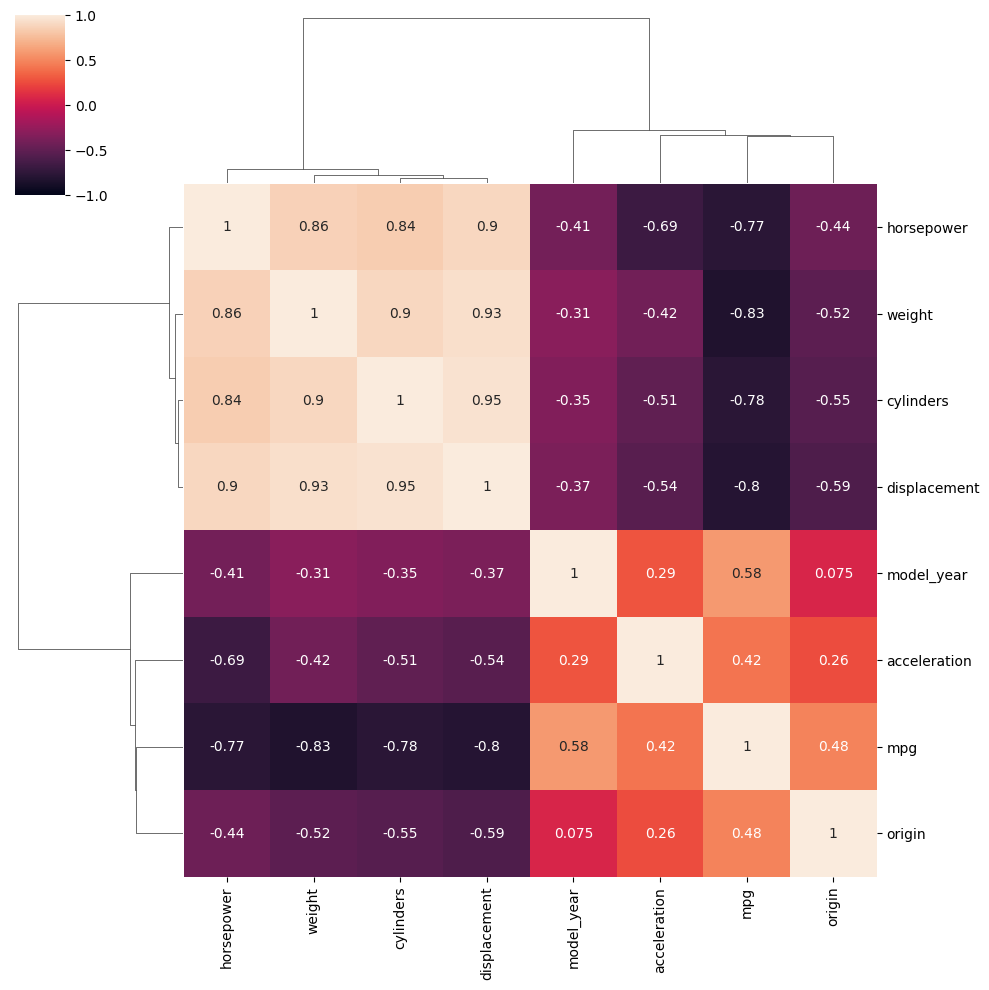

In [ ]:
#clustermap table shows group(cluster ) relationship
plt.figure(figsize = (5, 5))
sns.clustermap(df.corr(), vmin = -1, vmax =1, annot = True)  #vmax= most +ve corr, vmin= most -ve corr, 0 means no corr

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif

,Feature
0,mpg
1,cylinders
2,displacement
3,horsepower
4,weight
5,acceleration
6,model_year
7,origin


In [ ]:
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

In [ ]:
vif

,Feature,VIF
0,mpg,53.449934
1,cylinders,117.191188
2,displacement,101.901839
3,horsepower,65.410877
4,weight,172.067800
5,acceleration,69.209218
6,model_year,290.844630
7,origin,8.322385


In [ ]:
df1 = df.copy()
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,3
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [ ]:
df1.drop("model_year", axis=1, inplace=True)
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130.0,3504,12.0,1
1,15.0,8,350.0,165.0,3693,11.5,1
2,18.0,8,318.0,150.0,3436,11.0,1
3,16.0,8,304.0,150.0,3433,12.0,1
4,17.0,8,302.0,140.0,3449,10.5,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1
394,44.0,4,97.0,52.0,2130,24.6,3
395,32.0,4,135.0,84.0,2295,11.6,1
396,28.0,4,120.0,79.0,2625,18.6,1


In [ ]:
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [ ]:
vif

,Feature,VIF
0,mpg,20.232621
1,cylinders,108.235469
2,displacement,92.597731
3,horsepower,55.953222
4,weight,149.113990
5,acceleration,52.093023
6,origin,8.258284


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=vif)

https://docs.google.com/spreadsheets/d/1CnSCtpJnRM63Fw2AQnSFhN3OiyG0Ay7lODy9gvtTyhc#gid=0


In [ ]:
df1.drop("weight", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,mpg,18.358816
1,cylinders,106.286975
2,displacement,77.521871
3,horsepower,43.656711
4,acceleration,28.753648
5,origin,8.190286


In [ ]:
df1.drop("cylinders", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,mpg,17.753559
1,displacement,33.642790
2,horsepower,42.741764
3,acceleration,24.344301
4,origin,8.088967


In [ ]:
df1.drop("horsepower", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,mpg,16.940389
1,displacement,3.912248
2,acceleration,23.950582
3,origin,6.710190


In [ ]:
df1.drop("acceleration", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,mpg,7.231419
1,displacement,2.050251
2,origin,6.290270


Setting a hypothesis.

Null hypothesis (H0): There is no relationship between mpg and displacement. Alternative hypothesis (Ha): There is a relationship between mpg and displacement.

Fitting the model

statsmodels.regression.linear_model.OLS() method is used to get ordinary least squares, and fit() method is used to fit the data in it. The ols method takes in the data and performs linear regression. we provide the dependent and independent columns in this format :

inpendent_columns ~ dependent_column: left side of the ~ operator contains the independent variables and right side of the operator contains the name of the dependent variable or the predicted column.

In [ ]:
import statsmodels.formula.api as smf

# Correct the formula to have 'mpg' as the dependent variable
# and 'displacement' and 'origin' as independent variables
model = smf.ols(formula='mpg ~ displacement + origin', data=df1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     361.7
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           5.35e-90
Time:                        08:32:16   Log-Likelihood:                -1175.5
No. Observations:                 398   AIC:                             2357.
Df Residuals:                     395   BIC:                             2369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       34.9059      1.024     34.104   

Description of some of the terms in the table : R- squared value: R-squared value ranges between 0 and 1. An R-squared of 100 percent indicates that all changes in the dependent variable are completely explained by changes in the independent variable(s). if we get 1 as an r-squared value it means there’s a perfect fit. In our example, the r-squared value is 0.350. F- statistic: The F statistic simply compares the combined effect of all variables. In simplest terms, reject the null hypothesis if your alpha level is greater than your p-value. coef: the coefficients of the independent variables in the regression equation.

Our predictions: If we take our significance level (alpha) to be 0.05, we reject the null hypothesis and accept the alternative hypothesis as pvalue=1.27e-37=-33.54<+or-0.05, so there is defintely a relationship between displacement and mpg, although co-efficient of displacement is 0.002 as reflected in Stats Model, also the model curve is slightly right-skewed and the curve is playtkurtic, that is no outliers, since the outliers had been treated before.